We'll be working with a dataset on the job outcomes of students who graduated from college between 2010 and 2012. The original data on job outcomes was released by American Community Survey, which conducts surveys and aggregates the data. FiveThirtyEight cleaned the dataset and released it on their Github repo.

Each row in the dataset represents a different major in college and contains information on gender diversity, employment rates, median salaries, and more.
Here are some of the columns in the dataset:

Rank - Rank by median earnings (the dataset is ordered by this column).
Major_code - Major code.
Major - Major description.
Major_category - Category of major.
Total - Total number of people with major.
Sample_size - Sample size (unweighted) of full-time.
Men - Male graduates.
Women - Female graduates.
ShareWomen - Women as share of total.
Employed - Number employed.
Median - Median salary of full-time, year-round workers.
Low_wage_jobs - Number in low-wage service jobs.
Full_time - Number employed 35 hours or more.
Part_time - Number employed less than 35 hours.

Using visualizations, we can start to explore questions from the dataset like:
* Do students in more popular majors make more money? Using scatter plots
* How many majors are predominantly male? Predominantly female? Using histograms
* Which category of majors have the most students? Using bar plots

In [6]:
# Import pandas and matplotlib into the environment.
# Run the Jupyter magic %matplotlib inline so that plots are displayed inline.

import pandas as pd

# Read the dataset into a DataFrame and start exploring the data.
# Read recent-grads.csv into pandas and assign the resulting DataFrame to recent_grads.
recent_grads = pd.read_csv('recent-grads.csv')
# Use DataFrame.iloc[] to return the first row formatted as a table.
print(recent_grads.iloc[0])
# Use DataFrame.head() and DataFrame.tail() to become familiar with how the data is structured.
print(recent_grads.head())
# Use DataFrame.describe() to generate summary statistics for all of the numeric columns.
print(recent_grads.describe())

Rank                                        1
Major_code                               2419
Major                   PETROLEUM ENGINEERING
Total                                    2339
Men                                      2057
Women                                     282
Major_category                    Engineering
ShareWomen                           0.120564
Sample_size                                36
Employed                                 1976
Full_time                                1849
Part_time                                 270
Full_time_year_round                     1207
Unemployed                                 37
Unemployment_rate                   0.0183805
Median                                 110000
P25th                                   95000
P75th                                  125000
College_jobs                             1534
Non_college_jobs                          364
Low_wage_jobs                             193
Name: 0, dtype: object
   Rank  Ma

In [7]:
# Drop rows with missing values. Matplotlib expects that columns of values we pass in have matching lengths and missing 
# values will cause matplotlib to throw errors.
# Look up the number of rows in recent_grads and assign the value to raw_data_count.
raw_data_count = recent_grads.shape[0]
# Use DataFrame.dropna() to drop rows containing missing values and assign the resulting DataFrame back to recent_grads.
recent_grads = recent_grads.dropna(axis=0)
# Look up the number of rows in recent_grads now and assign the value to cleaned_data_count. If you compare cleaned_data_count
# and raw_data_count, you'll notice that only one row contained missing values and was dropped.
cleaned_data_count = recent_grads.shape[0]

# Scatter Plots

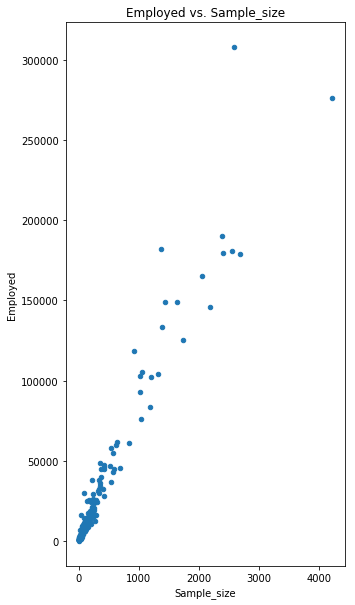

In [8]:
import matplotlib.pyplot as plt
% matplotlib inline
# Sample size (unweighted) of full-time employed
recent_grads.plot(x='Sample_size', y='Employed', kind='scatter',title='Employed vs. Sample_size', figsize=(5,10))

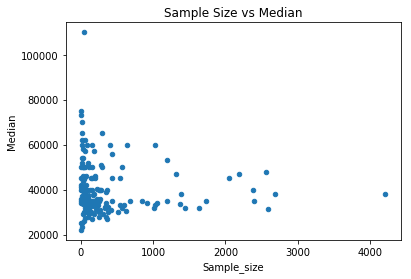

In [9]:
# Generate scatter plots in separate jupyter notebook cells to explore the following relations:
# Sample_size and Median
recent_grads.plot(x='Sample_size',y='Median',kind='scatter',title='Sample Size vs Median')

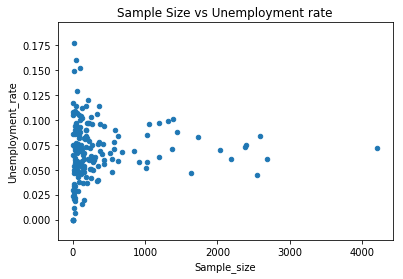

In [10]:
# Sample_size and Unemployment_rate
recent_grads.plot(x='Sample_size',y='Unemployment_rate',kind='scatter',title='Sample Size vs Unemployment rate')

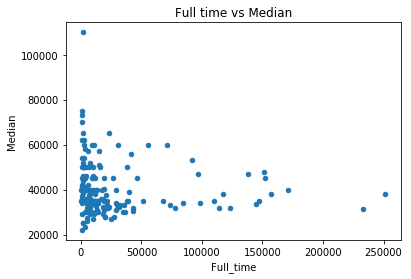

In [11]:
# Full_time and Median
recent_grads.plot(x='Full_time',y='Median',kind='scatter',title='Full time vs Median')

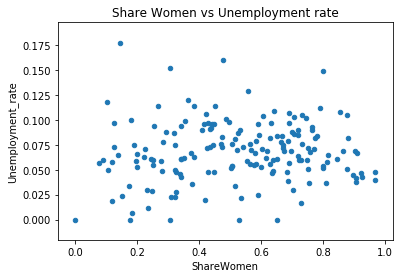

In [12]:
# ShareWomen and Unemployment_rate
recent_grads.plot(x='ShareWomen',y='Unemployment_rate',kind='scatter',title='Share Women vs Unemployment rate')

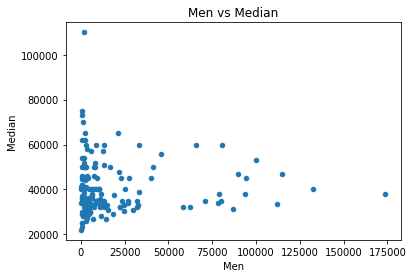

In [13]:
# Men and Median
recent_grads.plot(x='Men',y='Median',kind='scatter',title='Men vs Median')

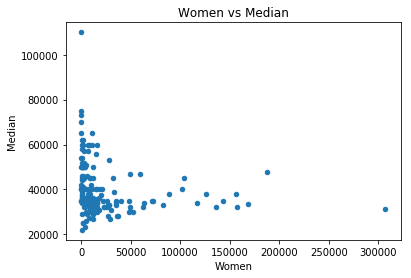

In [14]:
# Women and Median
recent_grads.plot(x='Women',y='Median',kind='scatter',title='Women vs Median')

# Histograms

Use the plots to explore the following questions:
* Do students in more popular majors make more money?
* Do students that majored in subjects that were majority female make more money?
* Is there any link between the number of full-time employees and median salary?

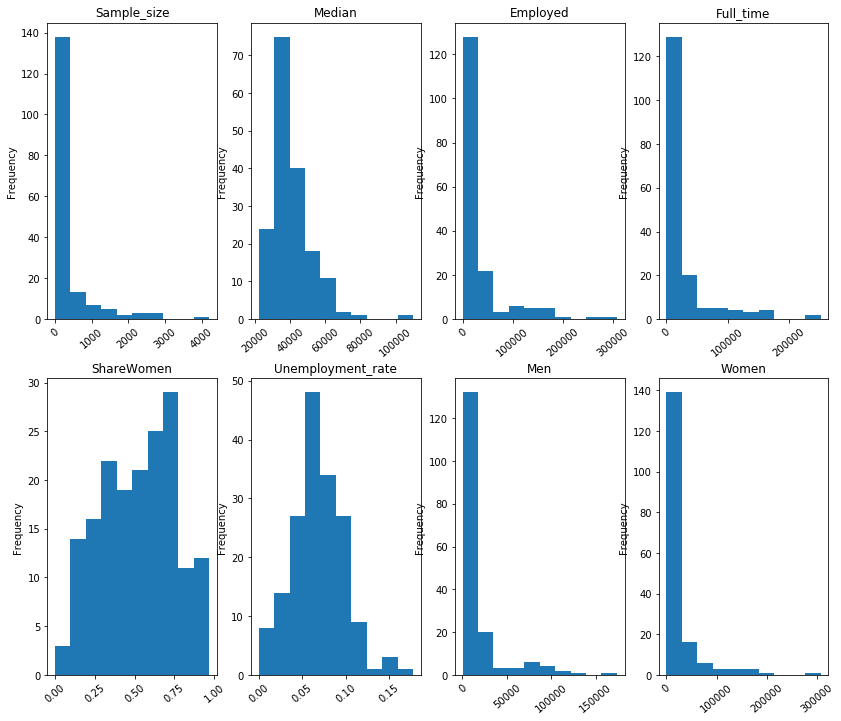

In [35]:
# Generate histograms in separate jupyter notebook cells to explore the distributions of the following columns:
# Sample_size
# Median
# Employed
# Full_time
# ShareWomen
# Unemployment_rate
# Men
# Women

# Experiment with different bin sizes and ranges when generating these histograms.
cols  =  ["Sample_size", "Median", "Employed", "Full_time", "ShareWomen", "Unemployment_rate", "Men", "Women"]
#              tuple     (width,heoght) in inches
fig = plt.figure(figsize=(14,12))
for r in range(0,len(cols)):
    #                   (#r,#c,chart num)
    ax = fig.add_subplot(2,4,r+1)
    ax = recent_grads[cols[r]].plot(kind='hist', rot=40)
    plt.title(cols[r])

Use the plots to explore the following questions:
What percent of majors are predominantly male? Predominantly female?
What's the most common median salary range?

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001D36BFDCC18>,
      dtype=object)

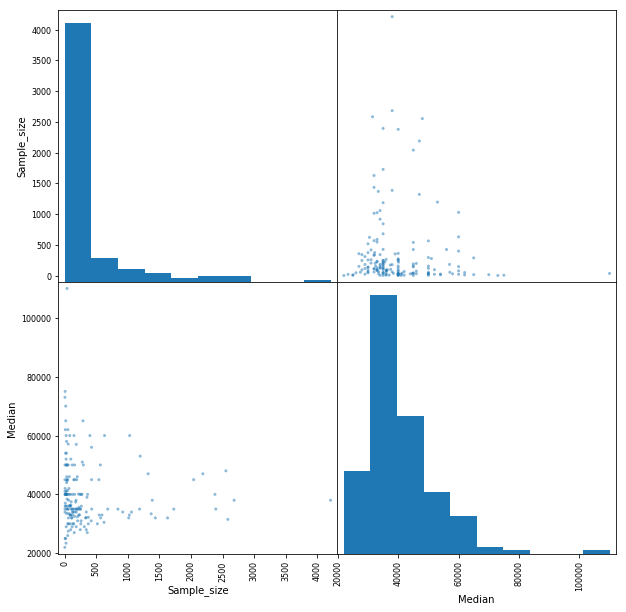

In [22]:
# Import scatter_matrix from the pandas.plotting module.
# Create a 2 by 2 scatter matrix plot using the Sample_size and Median columns.
from pandas.plotting import scatter_matrix
scatter_matrix(recent_grads[['Sample_size', 'Median']], figsize=(10,10))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001D36C2C0080>,
      dtype=object)

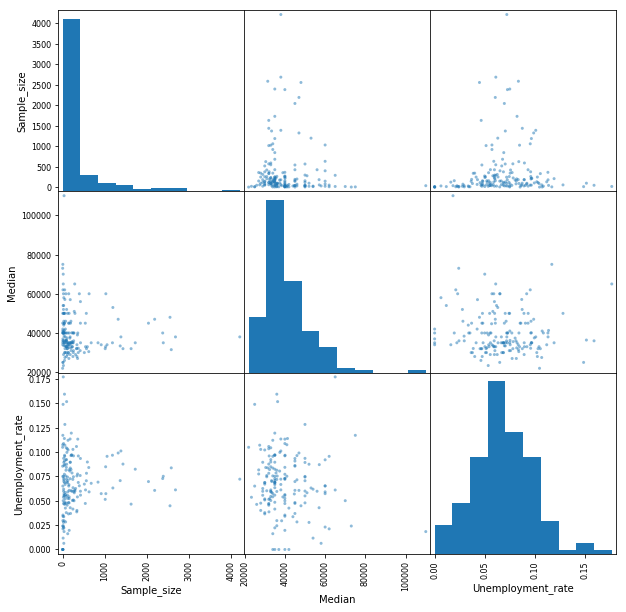

In [23]:
# Create a 3 by 3 scatter matrix plot using the Sample_size, Median, and Unemployment_rate columns.
# Explore the questions from the last few steps using these scatter matrix plots. 
# You may need to create more scatter matrix plots.
scatter_matrix(recent_grads[['Sample_size', 'Median','Unemployment_rate']], figsize=(10,10))

# Bar plots

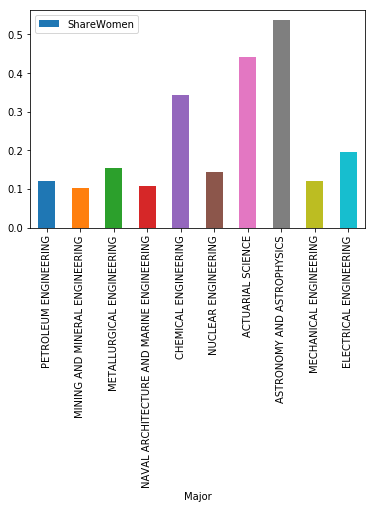

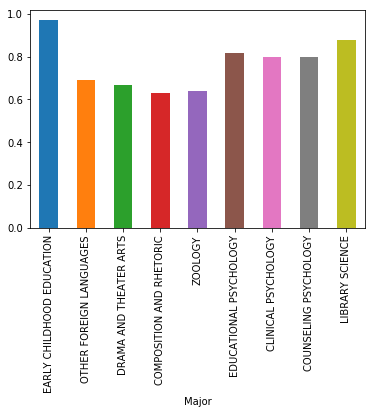

In [30]:
# Use bar plots to compare the percentages of women (ShareWomen) from the first 10 rows and last 10 rows of a sorted dataframe.
recent_grads[:10].plot.bar(x='Major', y='ShareWomen')
recent_grads[recent_grads.shape[0]-9:].plot.bar(x='Major', y='ShareWomen', legend=False)

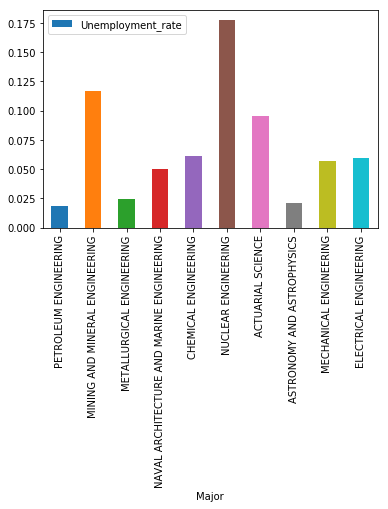

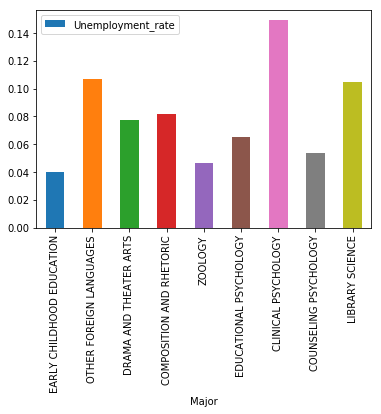

In [31]:
# Use bar plots to compare the unemployment rate (Unemployment_rate) from the first 10 rows and last 10 rows of a sorted dataframe
recent_grads[:10].plot.bar(x='Major', y='Unemployment_rate')
recent_grads[recent_grads.shape[0]-9:].plot.bar(x='Major', y='Unemployment_rate')